In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

In [41]:
os.chdir("C:/Users/Rubén/Documents/DATA ANALIST/git/TareasEBACmx/Practica M46")
df_apple = pd.read_csv("Analista de datos AAPL_2006-01-01_to_2018-01-01_M30.csv",index_col='Date',parse_dates=['Date'])

## Analisis EDA

In [42]:
df_apple.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.3400,10.6800,10.3200,10.6800,201853036,AAPL
2006-01-04,10.7300,10.8500,10.6400,10.7100,155225609,AAPL
2006-01-05,10.6900,10.7000,10.5400,10.6300,112396081,AAPL
2006-01-06,10.7500,10.9600,10.6500,10.9000,176139334,AAPL
2006-01-09,10.9600,11.0300,10.8200,10.8600,168861224,AAPL


In [43]:
df_apple.tail(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,174.6800,175.4200,174.5000,175.0100,16349444,AAPL
2017-12-26,170.8000,171.4700,169.6800,170.5700,33185536,AAPL
2017-12-27,170.1000,170.7800,169.7100,170.6000,21498213,AAPL
2017-12-28,171.0000,171.8500,170.4800,171.0800,16480187,AAPL
2017-12-29,170.5200,170.5900,169.2200,169.2300,25999922,AAPL


## Analisis Univariado

In [44]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [45]:
df_apple.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.0000,64.6733,44.5249,7.3900,23.4250,57.8600,99.1650,175.1100
High,3019.0000,65.2568,44.8118,7.5600,23.8050,58.4600,100.2750,177.2000
Low,3019.0000,64.0334,44.2308,7.1700,23.0150,57.3200,98.3850,174.8600
Close,3019.0000,64.6629,44.5364,7.2400,23.4200,57.9200,99.4800,176.4200
Volume,3019.0000,131145687.6638,101855966.2153,11475922.0000,52928887.0000,106627080.0000,179897651.5000,843264044.0000


In [46]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [47]:
df_apple.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.00,64.67,44.52,7.39,23.43,57.86,99.16,175.11
High,3019.00,65.26,44.81,7.56,23.80,58.46,100.28,177.20
Low,3019.00,64.03,44.23,7.17,23.02,57.32,98.39,174.86
Close,3019.00,64.66,44.54,7.24,23.42,57.92,99.48,176.42
Volume,3019.00,131145687.66,101855966.22,11475922.00,52928887.00,106627080.00,179897651.50,843264044.00


In [48]:
# Cuento de valores cero por columna
df_apple[df_apple==0].count() / df_apple.count()

Open     0.00
High     0.00
Low      0.00
Close    0.00
Volume   0.00
Name     0.00
dtype: float64

In [49]:
df_apple.shape

(3019, 6)

## Visualizacion en Lineas de Tiempo

In [50]:
df_apple

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...
2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL


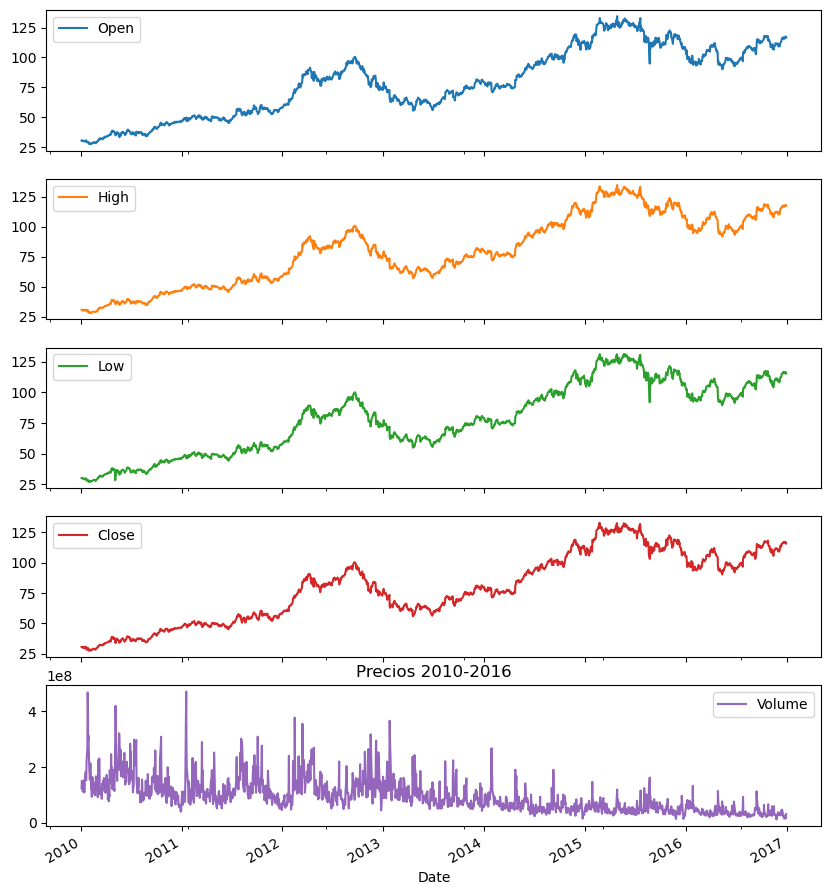

In [51]:
# Visualizacion Basica a traves de rangos
# Usando matplotlib
df_apple['2010':'2016'].plot(subplots=True, figsize=(10,12))
plt.title('Precios 2010-2016')
plt.show()

In [52]:
df_apple['Name'].nunique()

1

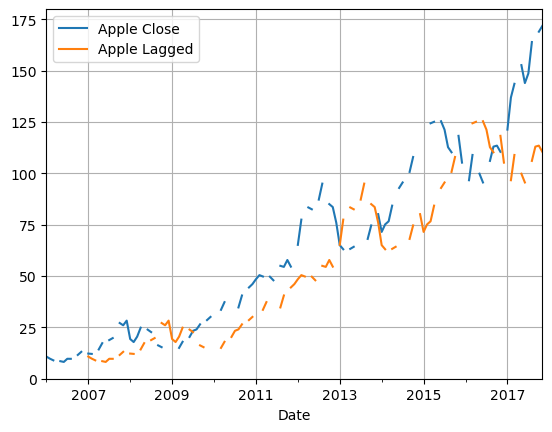

In [53]:
# Lag = 3 (meses)
df_apple["Close"].asfreq('M').plot(legend=True)
lag = 12
shifted = df_apple["Close"].asfreq('M').shift(lag).plot(legend=True)
shifted.legend(['Apple Close','Apple Lagged'])
plt.grid()
plt.show()

In [54]:
df_apple['Change'] = df_apple.Close.div(df_apple.Close.shift())

In [55]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_apple.head(20)


,Open,High,Low,Close,Volume,Name,Change
Date,,,,,,,
2006-01-03,10.3400,10.6800,10.3200,10.6800,201853036,AAPL,NaN
2006-01-04,10.7300,10.8500,10.6400,10.7100,155225609,AAPL,1.0028
2006-01-05,10.6900,10.7000,10.5400,10.6300,112396081,AAPL,0.9925
2006-01-06,10.7500,10.9600,10.6500,10.9000,176139334,AAPL,1.0254
2006-01-09,10.9600,11.0300,10.8200,10.8600,168861224,AAPL,0.9963
2006-01-10,10.8900,11.7000,10.8300,11.5500,570088246,AAPL,1.0635
2006-01-11,11.9800,12.1100,11.8000,11.9900,373548882,AAPL,1.0381
2006-01-12,12.1400,12.3400,11.9500,12.0400,320201966,AAPL,1.0042
2006-01-13,12.1400,12.2900,12.0900,12.2300,194153393,AAPL,1.0158


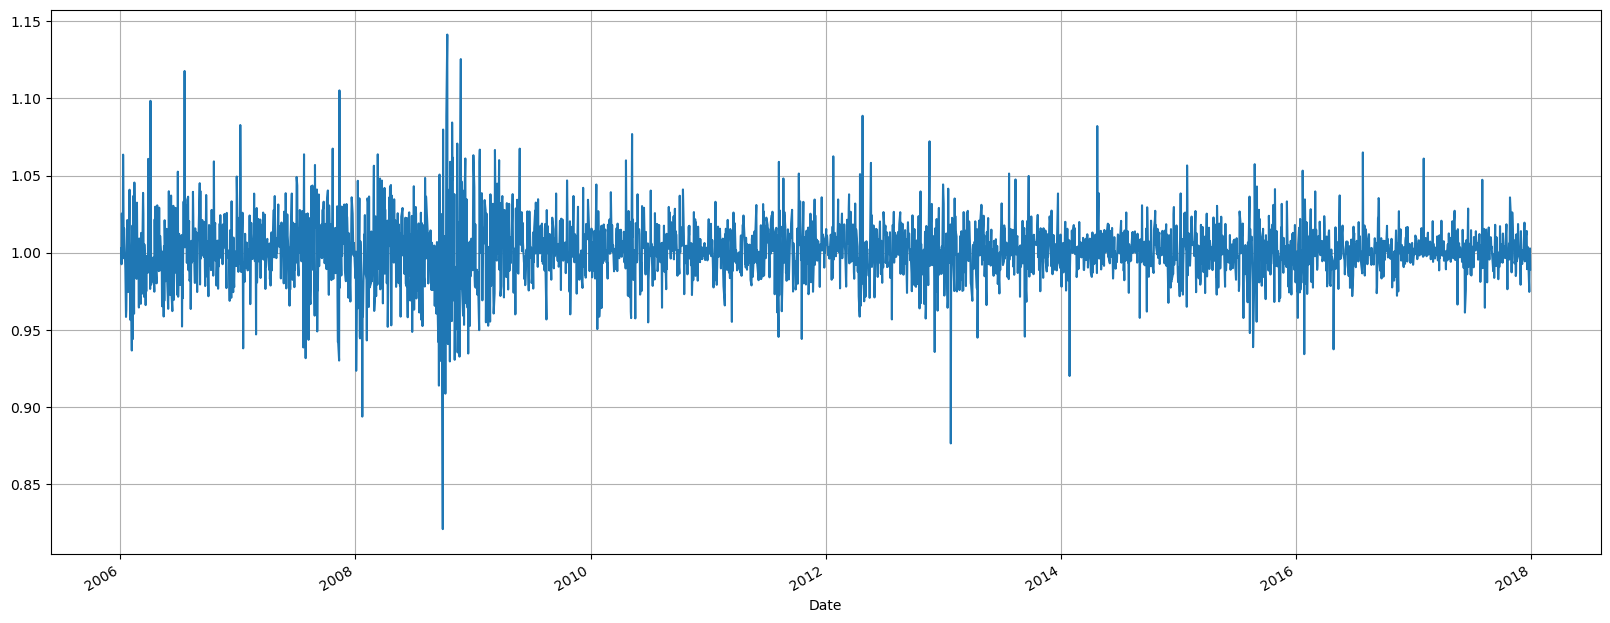

In [56]:
df_apple['Change'].plot(figsize=(20,8)).grid()

In [57]:
# Calcula el Retorno
df_apple['Return'] = df_apple['Change'].sub(1).mul(100)

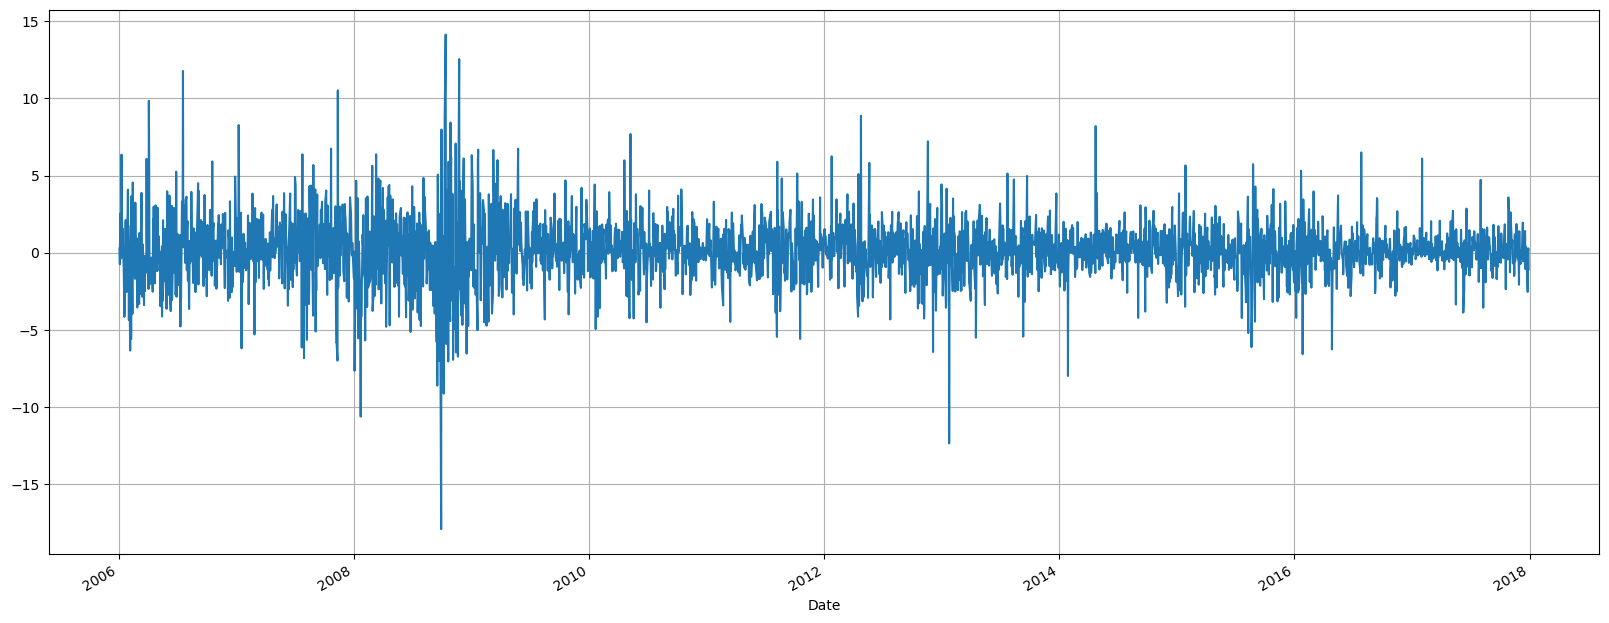

In [58]:
df_apple['Return'].plot(figsize=(20,8)).grid()

## Comparacion de dos Series

In [59]:
df_google = pd.read_csv("Analista de datos GOOGL_2006-01-01_to_2018-01-01_M31.csv",index_col='Date',parse_dates=['Date'])

In [60]:
df_google.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.4700,218.0500,209.3200,217.8300,13137450,GOOGL
2006-01-04,222.1700,224.7000,220.0900,222.8400,15292353,GOOGL
2006-01-05,223.2200,226.0000,220.9700,225.8500,10815661,GOOGL
2006-01-06,228.6600,235.4900,226.8500,233.0600,17759521,GOOGL
2006-01-09,233.4400,236.9400,230.7000,233.6800,12795837,GOOGL


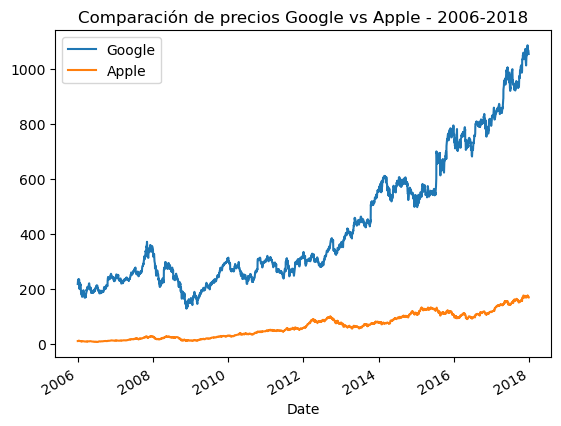

In [61]:
# Gráfico de Columnas de dos series diferentes
# Los precios son muy diferentes, lo que no deja ver el comportamiento exacto de cada una
df_google.Close.plot()
df_apple.Close.plot()
plt.legend(['Google','Apple'])
plt.title('Comparación de precios Google vs Apple - 2006-2018')
plt.show()

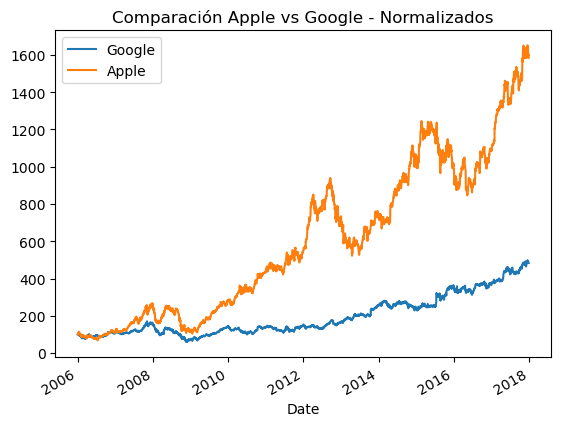

In [62]:
# Se normalizan las vistas con base 100 para tener una base de comparación similar
# La normalización toma como base el primer registro histórico (iloc[0])
# Ambos precios empiezan en 100

normal_google = df_google.Close.div(df_google.Close.iloc[0]).mul(100)
normal_apple = df_apple.Close.div(df_apple.Close.iloc[0]).mul(100)
normal_google.plot()
normal_apple.plot()
plt.legend(['Google','Apple'])
plt.title('Comparación Apple vs Google - Normalizados')
plt.show()

## Visualizacion de Medias

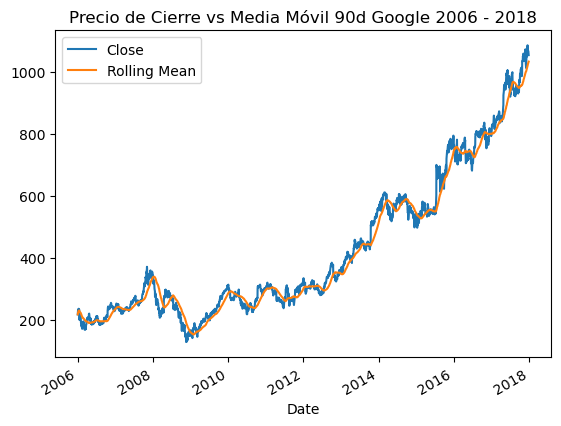

In [64]:
# Ventana Media Móvil en Google 90 días
# Se usa la función rolling
rolling_google = df_google.Close.rolling('90D').mean()
df_google.Close.plot()
rolling_google.plot()
plt.title('Precio de Cierre vs Media Móvil 90d Google 2006 - 2018')
plt.legend(['Close','Rolling Mean'])
plt.show()

In [ ]:
# Configuración de gráficos
from pylab import rcParams

from chart_studio import plotly
from chart_studio import grid_objs
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error

In [72]:
# Gráfico OHLC
rango = df_google.loc['2008-06']      # todas las filas de junio 2008

rango_ohlc = go.Ohlc(x=rango.index,
                     open=rango['Open'],
                     high=rango['High'],
                     low=rango['Low'],
                     close=rango['Close'])
data = [rango_ohlc]
iplot(data)

## Grafico de Velas (Candlestick)

In [83]:
# Gráfica de Velas (Candlestick)
# Selecciona marzo de 2008 usando el formato 'YYYY-MM'
rango_mar = df_google.loc['2008-03']

trace = go.Candlestick(x=rango_mar.index,
                       open=rango_mar['Open'],
                       high=rango_mar['High'],
                       low=rango_mar['Low'],
                       close=rango_mar['Close'])
data = [trace]
iplot(data)

## Descomposicion de una Serie de Tiempo

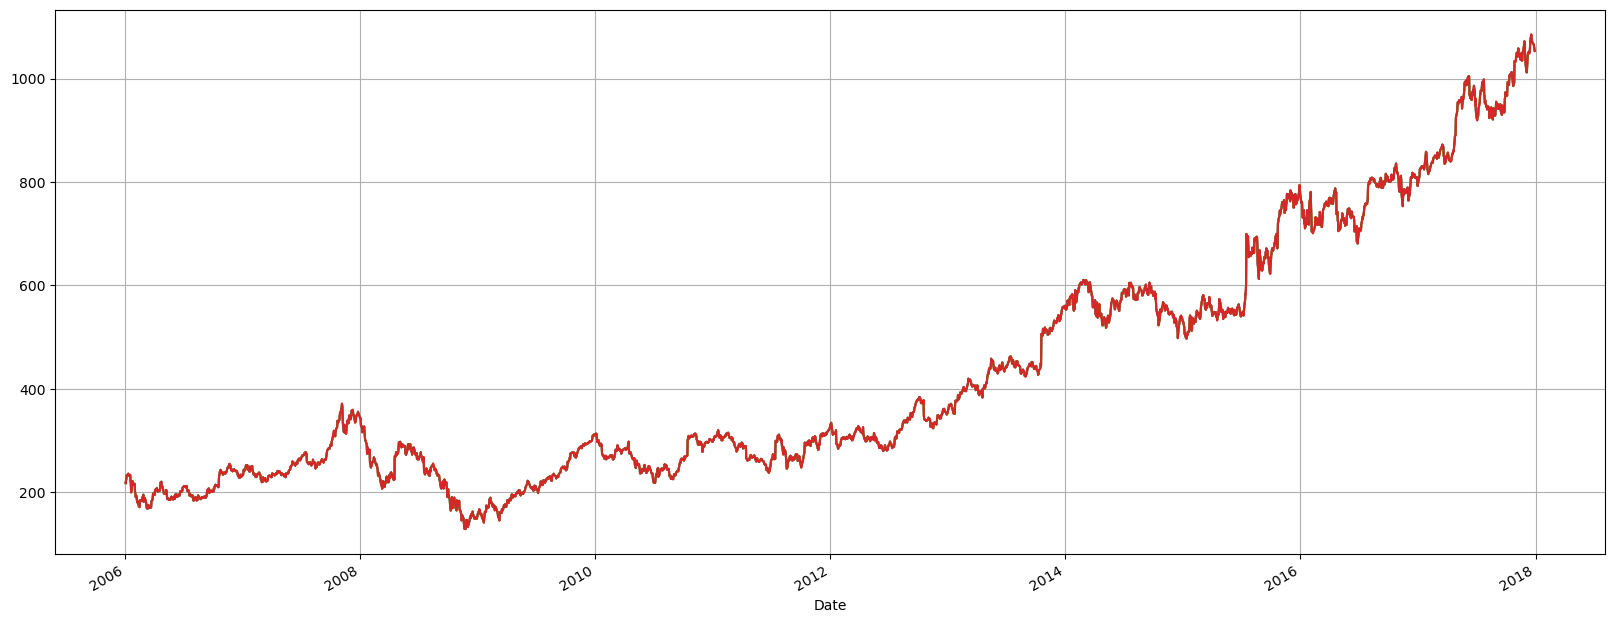

In [89]:
df_google['Close'].plot(figsize=(20,8)).grid()
plt.show()

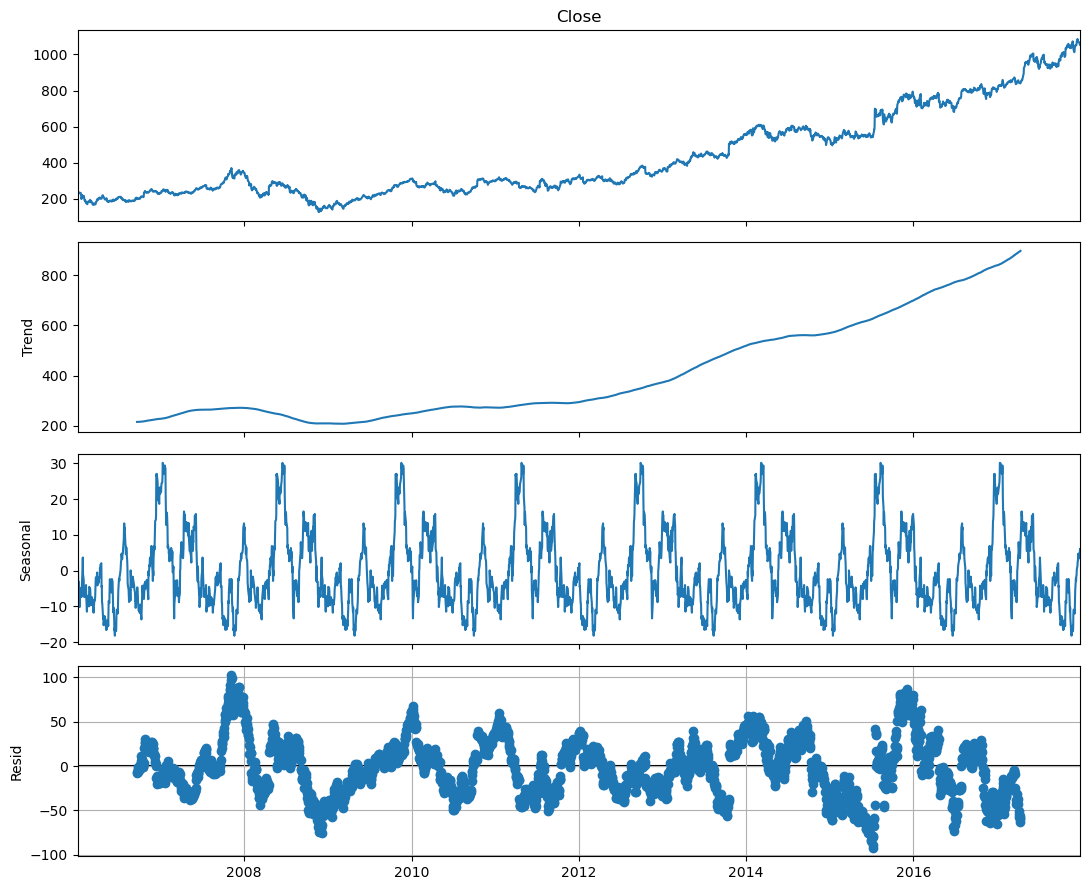

In [94]:
# Descomposicion de una Serie de Tiempo
plt.rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(df_google['Close'], period=360, model='additive')

figure = decomposition.plot()
plt.grid()
plt.show()

## Prediccion Simple - Medias Moviles

In [95]:
df_google.head(5)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.4700,218.0500,209.3200,217.8300,13137450,GOOGL
2006-01-04,222.1700,224.7000,220.0900,222.8400,15292353,GOOGL
2006-01-05,223.2200,226.0000,220.9700,225.8500,10815661,GOOGL
2006-01-06,228.6600,235.4900,226.8500,233.0600,17759521,GOOGL
2006-01-09,233.4400,236.9400,230.7000,233.6800,12795837,GOOGL


In [100]:
df_google = df_google.drop(columns=['Name'])

In [105]:
df_google = df_google.dropna()

In [106]:
df_google.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,211.4700,218.0500,209.3200,217.8300,13137450
2006-01-04,222.1700,224.7000,220.0900,222.8400,15292353
2006-01-05,223.2200,226.0000,220.9700,225.8500,10815661
2006-01-06,228.6600,235.4900,226.8500,233.0600,17759521
2006-01-09,233.4400,236.9400,230.7000,233.6800,12795837


In [107]:
ma_google = df_google.rolling(window=30)
ma_google_mean = ma_google.mean()
ma_google_mean.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-22,1049.6017,1056.9680,1042.4810,1049.7653,1476773.4333
2017-12-26,1050.4273,1057.7090,1043.0617,1050.4887,1474994.7667
2017-12-27,1051.2873,1058.3600,1043.6990,1051.1220,1480844.1667
2017-12-28,1052.1050,1059.1113,1044.5007,1051.5990,1478966.9333
2017-12-29,1052.7880,1059.7253,1045.2320,1052.1653,1488136.2000


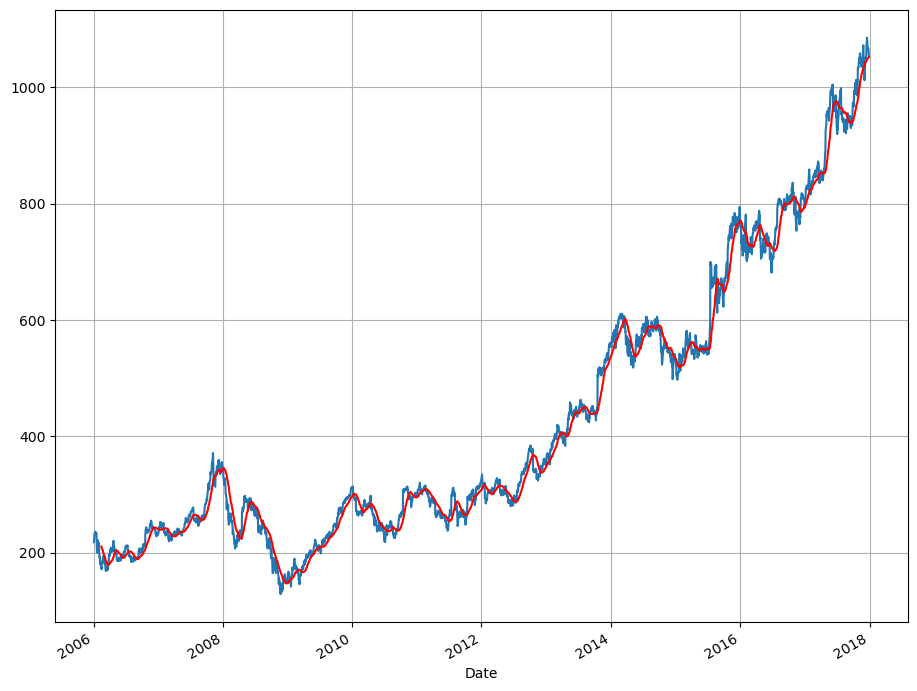

In [108]:
# Se muestran los dos datasets
df_google['Close'].plot()
ma_google_mean['Close'].plot(color='red')
plt.grid()
plt.show()

In [116]:
train_len = 2500
train = df_google[0:train_len]
test = df_google[train_len:]

In [117]:
y_pred_sma = df_google.copy()
ma_window = 30
y_pred_sma['sma_forecast'] = df_google['High'].rolling(ma_window).mean()
y_pred_sma['sma_forecast'][train_len:] = y_pred_sma['sma_forecast'][train_len-1]

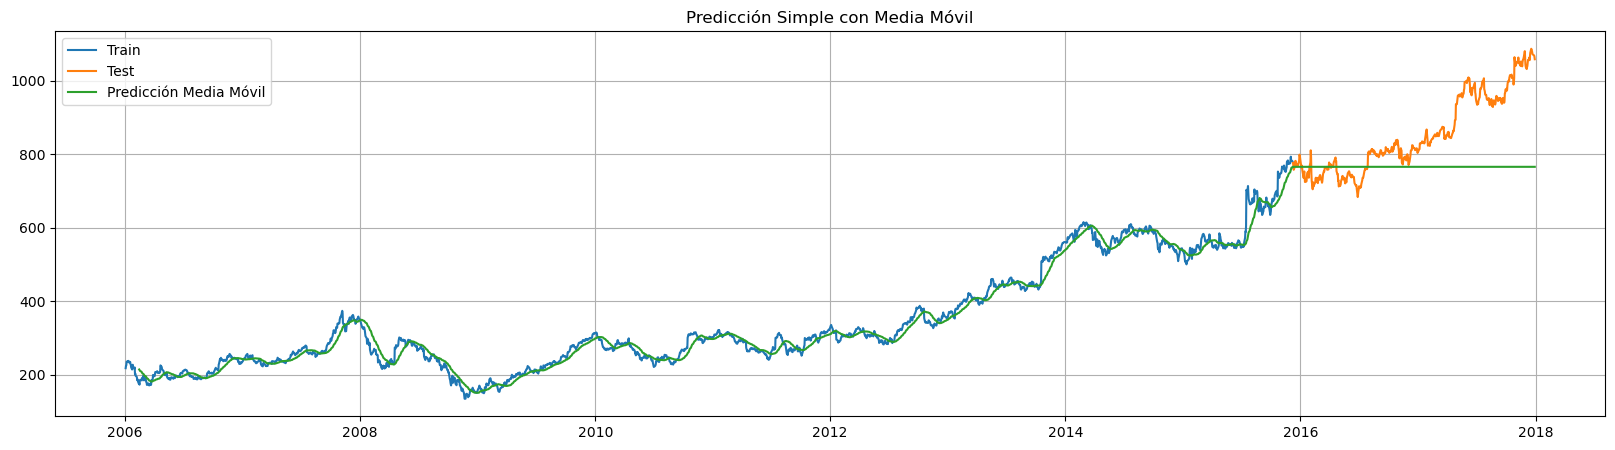

In [119]:
# Grafica las predicciones
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['High'], label='Train')
plt.plot(test['High'], label='Test')
plt.plot(y_pred_sma['sma_forecast'], label='Predicción Media Móvil')
plt.legend(loc='best')
plt.title('Predicción Simple con Media Móvil')
plt.show()

In [121]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['High'], y_pred_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['High']-y_pred_sma['sma_forecast'][train_len:])/test['High'])*100,2)

results = pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,138.2200,11.0400
